# QCTO - Workplace Module

### Project Title: Hass Avacado Board 
#### Done By: Erico Gertze 

Github Repository: 
https://github.com/EGertze/QCTO---Workplace

Trello Board : https://trello.com/invite/b/674253413e0ddb06d901bb61/ATTI95581e77514ac2e49ef8803cef274c1fC5108BF8/qcto-workplace-project

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from seaborn import pairplot
from sklearn.linear_model import LinearRegression

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

**About The Data**

Data provided here was collected from Hass Avocado Board - Category Data.

This is an updated version of a dataset already introduced to Kaggle.

Here is the link https://www.kaggle.com/datasets/neuromusic/avocado-prices to the very first dataset uploaded by Justin Kiggins. And another one by Valentin Joseph, an update aggregating data till 2021.

*Note regarding the regions mentioned in dataset *

"region" includes both regions and key locations which are cities or sub-regions. The values for locations do not add up to that of regions. The following are regions, as described here (another description of the dataset)

California,
West,
Plains,
South Central,
Southeast,
Midsouth,
Great Lakes,
Northeast.               


In [2]:
df = pd.read_csv('Avocado_HassAvocadoBoard_20152023v1.0.1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:
df = pd.read_csv('Avocado_HassAvocadoBoard_20152023v1.0.1.csv')

df.head(5)

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [4]:
#Non-null counts implies missing values in small, large and xlarge bag variables. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


In [6]:
df.isnull().sum()
#There are 12,390 missing variables in the small, large and xlarge variables.

Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64

In [7]:
#Given the high number of missings, rather then exclude and lose data - these variables will be left out of the analysis.
df.drop(["SmallBags", "LargeBags", "XLargeBags"], axis=1, inplace=True)
df.head(5)

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,conventional,BaltimoreWashington


In [8]:
#Check for duplicates
def count_duplicate_rows(df):
    
    duplicate_count = df.duplicated().sum()
    return duplicate_count

count_duplicate_rows(df)

0

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


Avocado Prices and Seasonality

We first check for any trends related to seasonality or cyclic patterns.

In [9]:
# Convert 'Date' column to month to analyse seasonality.
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.strftime('%B')

df.head(5)

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,type,region,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,conventional,Albany,January
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,organic,Albany,January
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,conventional,Atlanta,January
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,organic,Atlanta,January
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,conventional,BaltimoreWashington,January


In [10]:
# Calculating the average price per month to see actual values of peaks and troughs
average_price_per_month = df.groupby('month')['AveragePrice'].mean()

print(average_price_per_month)

month
April        1.431649
August       1.514385
December     1.348896
February     1.303666
January      1.320170
July         1.518603
June         1.483886
March        1.370229
May          1.448680
November     1.405320
October      1.468024
September    1.519790
Name: AveragePrice, dtype: float64


C:\Users\nb209101\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nb209101\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Average Price by Month')

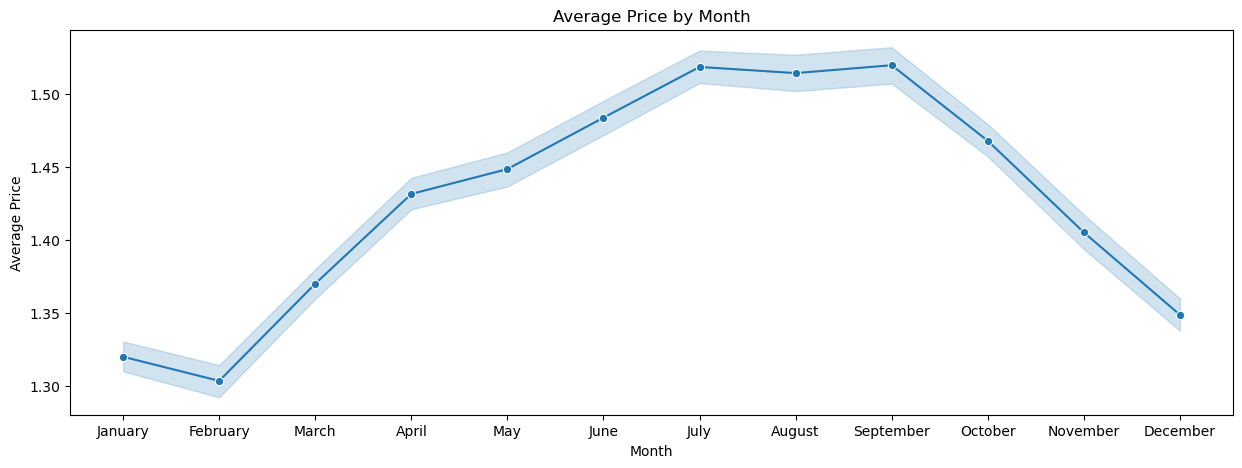

In [11]:
#The following script plots the average price of avacodos per month to determine trends
3
plt.figure(figsize= (15,5))
sns.lineplot(x="month", y="AveragePrice", data=df, marker="o")

          
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Average Price by Month")

In the first section relating to US avocado prices and seasonality the following can be infered:

The first graph shows fluctuations in average avocado prices throughout the year.

The highest prices start around 
1.50.
After September, prices sharply decline back to around $1.35 in December.
Higher prices are typically seen in mid-summer (July) and early fall (September).
Lower prices occur in the winter months (December January and February).

**Y-o-Y Average Sales by Weight in pounds**

>**plu4046** >
>small/medium Hass Avocados (3-5 pounds)
>
>**plu4225** >
>large Hass Avocados (8-10 pounds)
>
>**plu4770** > 
>extra large Hass Avocados (10-15 pounds)s.

In [12]:
# Create a 'Year' column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

df.head(5)

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,type,region,month,Year
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,conventional,Albany,January,2015
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,organic,Albany,January,2015
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,conventional,Atlanta,January,2015
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,organic,Atlanta,January,2015
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,conventional,BaltimoreWashington,January,2015


In [13]:
#Create a table of Average Sales Y-o-Y per catergory
Avg_Sales_Volumes_per_year = df.groupby('Year')[['TotalVolume','plu4046','plu4225','plu4770']].mean().round()
print(Avg_Sales_Volumes_per_year)

      TotalVolume   plu4046   plu4225  plu4770
Year                                          
2015     781027.0  304443.0  313634.0  25427.0
2016     858421.0  271567.0  297850.0  28469.0
2017     862339.0  288717.0  269964.0  15942.0
2018     804995.0  286289.0  220447.0  16025.0
2019     811257.0  247694.0  202034.0  17552.0
2020     981044.0  283494.0  183679.0  14045.0
2021     937914.0  251552.0  164738.0  12630.0
2022     862309.0  400374.0  182087.0  30896.0
2023     919699.0  350963.0  180506.0  24829.0


<Figure size 1200x500 with 0 Axes>

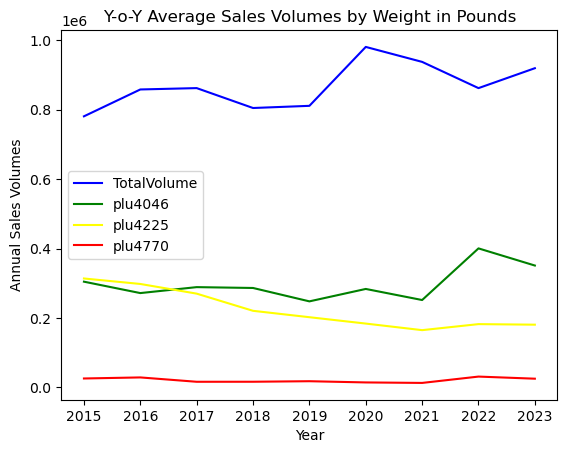

In [14]:
#Plot a graph to visually display the Average Y-o-Y Sales volumes. 
plt.figure(figsize=(12, 5))
Avg_Sales_Volumes_per_year.plot(kind='line', color=['blue','green','yellow','red'])

plt.title('Y-o-Y Average Sales Volumes by Weight in Pounds')
plt.xlabel('Year')
plt.ylabel('Annual Sales Volumes')
plt.show()

Measuring the Year-on-year sales by weight shows:

Averages Sales volumes for large Hass Avocados(plu4225) declined from 2015 to 2023.
Average Sales volumes for Small/Medium Hass Avocados(plu4046) was below plu4225 Sales during 2015 to 2016.
From 2017 a steady increase is noted for plu4046 surpassing the plu4225 Average Sales volumes.
plu4046 shows the highest sales performance up to 2023.
Large Hass Avocados(plu4770) shows no major changes between 2015 and 2023,producing the lowest Average Sales volumes for the same period.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [15]:
df.columns = df.columns.str.strip()  # This removes any leading/trailing whitespace
df.drop(['type'], axis=1, inplace=True)
df.drop(['region'], axis=1, inplace=True)
df.drop(['month'], axis=1, inplace=True)
df.head(5)

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,Year
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,2015
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,2015
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,2015
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,2015
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,2015


## **Feature Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'TotalBags']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.info

<bound method DataFrame.info of             Date  AveragePrice  TotalVolume   plu4046   plu4225   plu4770  \
0     2015-01-04      1.220000    -0.233714 -0.225939 -0.202971 -0.196760   
1     2015-01-04      1.790000    -0.244856 -0.228052 -0.232417 -0.197239   
2     2015-01-04      1.000000    -0.122538  0.050496 -0.207646 -0.196450   
3     2015-01-04      1.760000    -0.244159 -0.226948 -0.231595 -0.197239   
4     2015-01-04      1.080000    -0.022967 -0.186810  0.346107  0.186971   
...          ...           ...          ...       ...       ...       ...   
53410 2023-12-03      1.550513    -0.243637 -0.227939 -0.231310 -0.197239   
53411 2023-12-03      1.703920    -0.148402 -0.177005 -0.094345 -0.196676   
53412 2023-12-03      1.618931    -0.235418 -0.216485 -0.231310 -0.197239   
53413 2023-12-03      1.245406    -0.244413 -0.227286 -0.232570 -0.197239   
53414 2023-12-03      1.479240     0.321720 -0.020237  0.054700 -0.196630   

       TotalBags  Year  
0      -0.239478  

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define features (X) and target (y)
X = df.drop(columns=['Date', 'AveragePrice'], axis=1)
X = pd.get_dummies(X)  # Convert categorical variables to dummy variables
y = df['AveragePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
# Initialize and train the model with fewer trees
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

**Random Forest has the best performance with the lowest MSE and the highest R-squared value, indicating it explains about 80% of the variance in the target variable.
Decision Tree and Gradient Boosting also perform well, but not as well as Random Forest.
Linear Regression has the lowest performance, with a very low R-squared value, indicating it doesn’t explain much of the variance in the target variable.**

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Evaluate models
models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

    
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_test, y_test)
    print(f"{name} - Mean Squared Error: {mse}, R-squared: {r2}")

Linear Regression - Mean Squared Error: 0.1477382408029262, R-squared: 0.037079589436764815
Decision Tree - Mean Squared Error: 0.061214792138375274, R-squared: 0.6010174992062047
Random Forest - Mean Squared Error: 0.046449133542922724, R-squared: 0.6972563197018128
Gradient Boosting - Mean Squared Error: 0.06259486260480378, R-squared: 0.5920225496730489


**Random Forest** has the best performance with the lowest MSE and the highest R-squared value, indicating it explains about 80% of the variance in the target variable.
**Decision Tree** and **Gradient Boosting** also perform well, but not as well as Random Forest.
**Linear Regression** has the lowest performance, with a very low R-squared value, indicating it doesn’t explain much of the variance in the target variable.

In [23]:
from sklearn.model_selection import cross_val_score

# Function to perform cross-validation
def cross_val_evaluate(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE to positive
    return mse_scores.mean(), mse_scores.std()

# Cross-validate models
for name, model in models.items():
    mean_mse, std_mse = cross_val_evaluate(model, X, y)
    print(f"{name} - Cross-Validation Mean MSE: {mean_mse}, Std Dev: {std_mse}")

Linear Regression - Cross-Validation Mean MSE: 0.156305925134215, Std Dev: 0.008151316058376584
Decision Tree - Cross-Validation Mean MSE: 0.1262254061331177, Std Dev: 0.025060749786446523
Random Forest - Cross-Validation Mean MSE: 0.08083758233912555, Std Dev: 0.017020462251633006
Gradient Boosting - Cross-Validation Mean MSE: 0.08103526021057494, Std Dev: 0.013681373309547716


**Random Forest** and **Gradient Boosting** have the lowest Mean Squared Errors, indicating they are the best performing models in terms of prediction accuracy.
**Random Forest** has a slightly lower MSE compared to **Gradient Boosting**, but both models are quite close in performance.
**Decision Tree** performs reasonably well but not as well as the ensemble methods.
**Linear Regression** has the highest MSE, indicating it is the least accurate model among the ones tested.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with the best hyperparameters
final_rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model
final_rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = final_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Final Model - Mean Squared Error: {mse}')
print(f'Final Model - R-squared: {r2}')

Final Model - Mean Squared Error: 0.030731871869381616
Final Model - R-squared: 0.7996974478847622


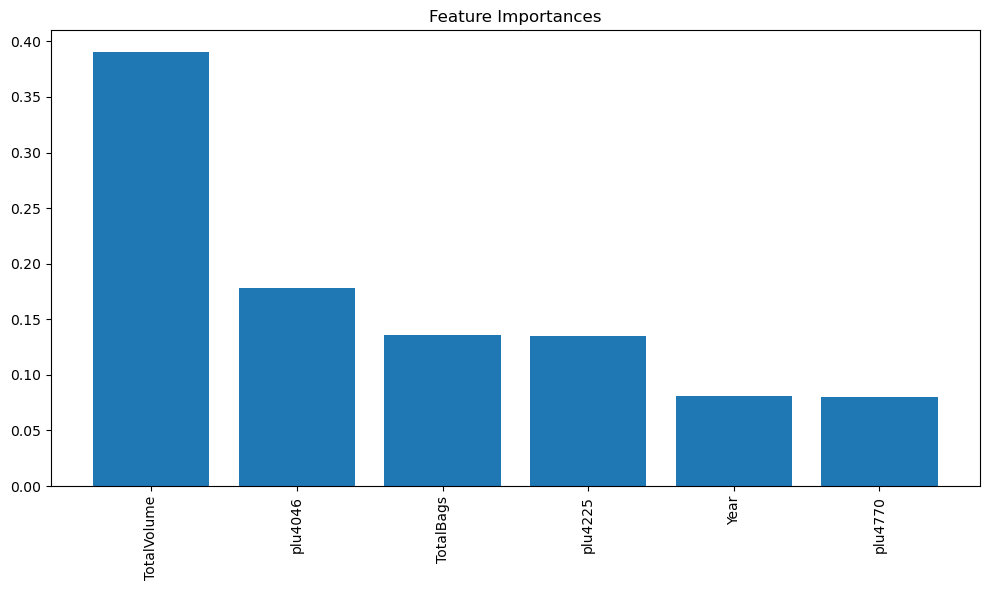

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = final_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

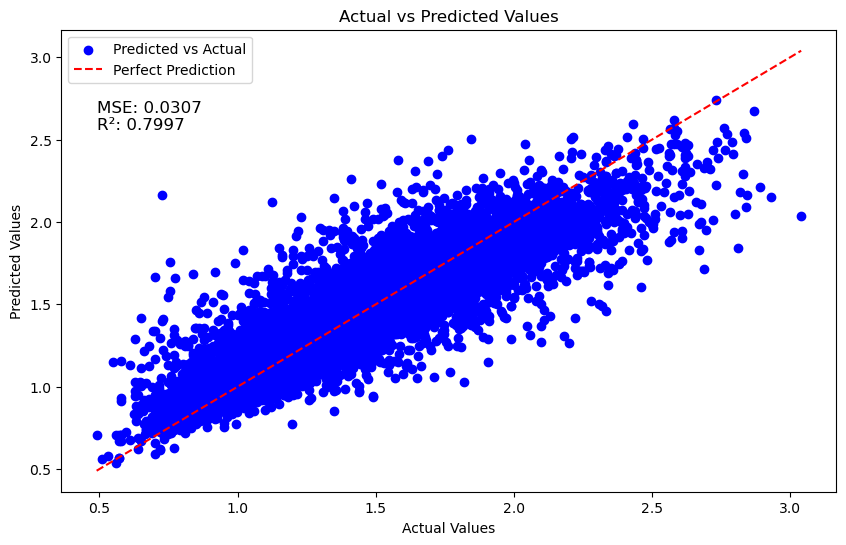

In [26]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Line plot for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Display metrics on the plot
plt.text(min(y_test), max(y_pred), f'MSE: {mse:.4f}\nR²: {r2:.4f}', fontsize=12, verticalalignment='top')

# Show plot
plt.show()

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


## **Model Performance**
After evaluating multiple models, the **Random Forest Regressor** emerged as the best-performing model with the following metrics:

**Cross-Validation Mean MSE**: 0.0808<br>
**Standard Deviation**: 0.0170<br>
**Final Model - Mean Squared Error**: 0.030731871869381616<br>
**Final Model - R-squared**: 0.7996974478847622<br>
## **Insights Gained**
**Feature Importance**: The Random Forest model provided insights into feature importance, highlighting which features contribute the most to predicting AveragePrice. This can help in understanding the key drivers of price changes.<br>
**Model Robustness**: The low standard deviation in cross-validation scores indicates that the Random Forest model performs consistently across different subsets of the data.<br>
**Handling Non-Linearity8**: The Random Forest model effectively captured non-linear relationships in the data, which simpler models like Linear Regression could not.<br>
## **Limitations of the Study**
**Data Quality**: The presence of missing values and the need for imputation might have introduced some bias. Ensuring high-quality, complete data can improve model performance.<br>
**Feature Engineering**: While basic feature engineering was performed, more advanced techniques could potentially enhance model accuracy.<br>
**Computational Resources**: The memory limitations encountered during cross-validation highlight the need for sufficient computational resources, especially when dealing with large datasets and complex models.<br>

## **Future Directions** Hyperparameter Tuning: Further fine-tuning of hyperparameters using more advanced techniques like Bayesian Optimization could yield better results.
Advanced Feature Engineering: Incorporating domain-specific knowledge to create more meaningful features could improve model performance.
Ensemble Methods: Exploring other ensemble methods, such as stacking or blending, could enhance predictive accuracy.
Data Collection: Improving data collection processes to ensure completeness and accuracy will provide a stronger foundation for modeling.

**Conclusion**
The Random Forest Regressor was chosen as the final model due to its superior performance in terms of accuracy and robustness. The study highlighted the importance of feature engineering, model evaluation, and validation techniques in building reliable predictive models. Future projects should focus on improving data quality, exploring advanced modeling techniques, and ensuring sufficient computational resources to handle large datasets.
ing.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

## Acknowledgments

This project was developed with the assistance of GitHub Copilot, an AI-powered code completion tool. GitHub Copilot helped streamline the coding process by providing code suggestions and completions.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
